<a href="https://colab.research.google.com/github/200101081/Project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# Importing all important libraries to the project

In [67]:
df =pd.read_csv('https://raw.githubusercontent.com/200101081/Project/main/project_df.csv')
df
# Reading csv file from the link

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_
0,S,0,12/2/1997,0,12/3/1997,18,25,0,D,-8.6,0.0
1,I,0,2/11/1979,0,2/11/1979,12,-999,0,D,-16.4,0.0
2,A,6,FIFI,0,9/6/1958,6,65,0,S,15.6,-55.7
3,A,6,FRANCES,0,9/2/2004,0,120,939,H,22.2,-71.4
4,A,3,UNNAMED,0,9/3/1948,0,40,0,S,53.8,-50.0
...,...,...,...,...,...,...,...,...,...,...,...
227569,W,0,THIRTYFIVE,0,12/25/2018,600,25,0,D,135.2,8.2
227570,W,0,THIRTYFIVE,0,12/25/2018,0,25,0,D,135.7,7.5
227571,W,0,THIRTYFIVE,0,12/24/2018,1800,25,0,D,135.8,7.2
227572,W,0,THIRTYSIX,0,12/31/2018,1800,30,0,D,111.0,6.6


In [68]:
df.info()
# Additional information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227574 entries, 0 to 227573
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   REGION    227574 non-null  object 
 1   STORM_NO  227574 non-null  int64  
 2   NAME      227574 non-null  object 
 3   ADVISORY  227574 non-null  int64  
 4   ADV_DATE  227506 non-null  object 
 5   ADV_HOUR  227574 non-null  int64  
 6   SPEED     227574 non-null  int64  
 7   PRESSURE  227574 non-null  int64  
 8   TYPE      227563 non-null  object 
 9   LAT       227574 non-null  float64
 10  LONG_     227574 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 19.1+ MB


In [69]:
num_ft = [var for var in df.columns if df[var].dtypes != 'O']
num_ft_num = len(num_ft)
print('Number of numerical features: ', num_ft_num)
for var in num_ft:
    print(var)

#Finding numerical features of the dataframe

Number of numerical features:  7
STORM_NO
ADVISORY
ADV_HOUR
SPEED
PRESSURE
LAT
LONG_


In [70]:
new_df = df.isnull()
new_df.tail()
# Showing where in dataframe data is null

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_
227569,False,False,False,False,False,False,False,False,False,False,False
227570,False,False,False,False,False,False,False,False,False,False,False
227571,False,False,False,False,False,False,False,False,False,False,False
227572,False,False,False,False,False,False,False,False,False,False,False
227573,False,False,False,False,False,False,False,False,False,False,False


In [78]:
# Dropping the missing values of dataframe
df = df.dropna() 
df.count()

region      227495
storm_no    227495
name        227495
ADVISORY    227495
ADV_DATE    227495
ADV_HOUR    227495
speed       227495
pressure    227495
type        227495
LAT         227495
LONG_       227495
dtype: int64

In [79]:
# After dropping the values that are null
print(df.isnull().sum())

region      0
storm_no    0
name        0
ADVISORY    0
ADV_DATE    0
ADV_HOUR    0
speed       0
pressure    0
type        0
LAT         0
LONG_       0
dtype: int64


In [71]:
df.dtypes
#Checking the data type

REGION       object
STORM_NO      int64
NAME         object
ADVISORY      int64
ADV_DATE     object
ADV_HOUR      int64
SPEED         int64
PRESSURE      int64
TYPE         object
LAT         float64
LONG_       float64
dtype: object

In [74]:
df = df.rename(columns={"REGION": "region", "STORM_NO": "storm_no", "NAME": "name", "SPEED": "speed","PRESSURE": "pressure", "TYPE": "type"})
df.head(10)

,region,storm_no,name,ADVISORY,ADV_DATE,ADV_HOUR,speed,pressure,type,LAT,LONG_
0,S,0,12/2/1997,0,12/3/1997,18,25,0,D,-8.6,0.0
1,I,0,2/11/1979,0,2/11/1979,12,-999,0,D,-16.4,0.0
2,A,6,FIFI,0,9/6/1958,6,65,0,S,15.6,-55.7
3,A,6,FRANCES,0,9/2/2004,0,120,939,H,22.2,-71.4
4,A,3,UNNAMED,0,9/3/1948,0,40,0,S,53.8,-50.0
5,A,9,HELENE,0,9/27/1988,18,77,979,H,30.9,-51.9
6,I,0,1/2/1966,0,1/4/1966,12,-999,0,D,-13.7,0.0
7,A,3,CINDY,0,7/9/2005,6,25,1009,D,40.8,-70.7
8,I,0,4/4/1992,0,4/6/1992,18,40,0,S,-10.3,0.0
9,S,0,1/29/1963,0,1/30/1963,18,-999,0,D,-20.1,0.0


In [75]:
# Total number of rows and columns in data frame
df.shape



(227574, 11)

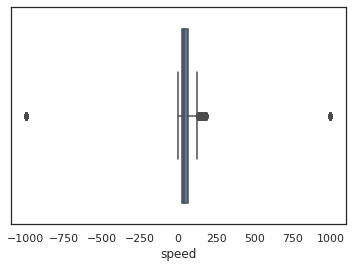

In [80]:
sns.boxplot(x=df['speed'])

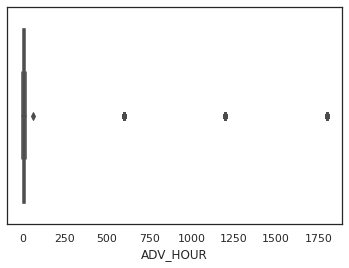

In [81]:
sns.boxplot(x=df['ADV_HOUR'])

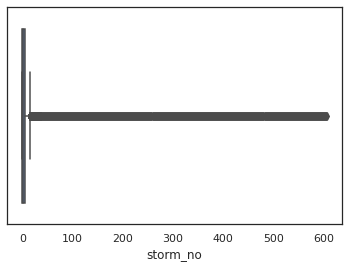

In [82]:
sns.boxplot(x=df['storm_no'])

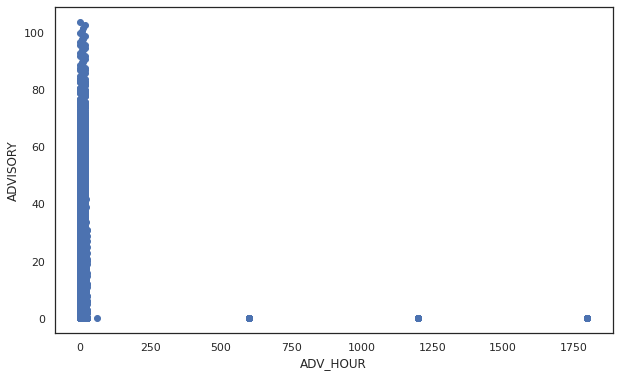

In [88]:
# Plotting a scatter plot 
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['ADV_HOUR'], df['ADVISORY'])
ax.set_xlabel('ADV_HOUR')
ax.set_ylabel('ADVISORY')
plt.show()

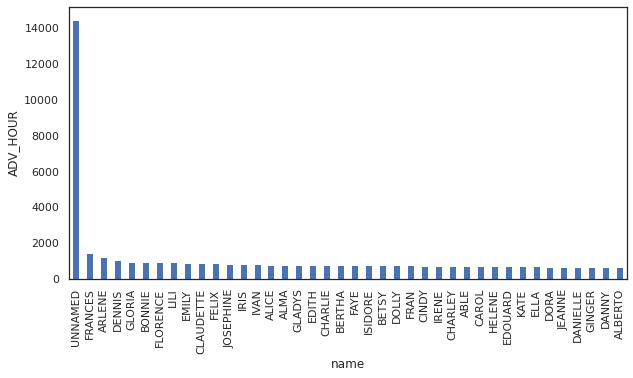

In [90]:
# Plotting a Histogram
df.name.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.ylabel('ADV_HOUR')
plt.xlabel('name');


,storm_no,ADVISORY,ADV_HOUR,speed,pressure,LAT,LONG_
storm_no,1.000000,-0.004174,-0.014414,0.080560,0.084347,0.093511,0.055398
ADVISORY,-0.004174,1.000000,-0.023942,0.140083,-0.225242,0.110610,0.217050
ADV_HOUR,-0.014414,-0.023942,1.000000,0.022820,-0.038463,0.298564,0.042968
speed,0.080560,0.140083,0.022820,1.000000,0.224515,0.471214,-0.191429
pressure,0.084347,-0.225242,-0.038463,0.224515,1.000000,0.323315,-0.467663
LAT,0.093511,0.110610,0.298564,0.471214,0.323315,1.000000,-0.339019
LONG_,0.055398,0.217050,0.042968,-0.191429,-0.467663,-0.339019,1.000000


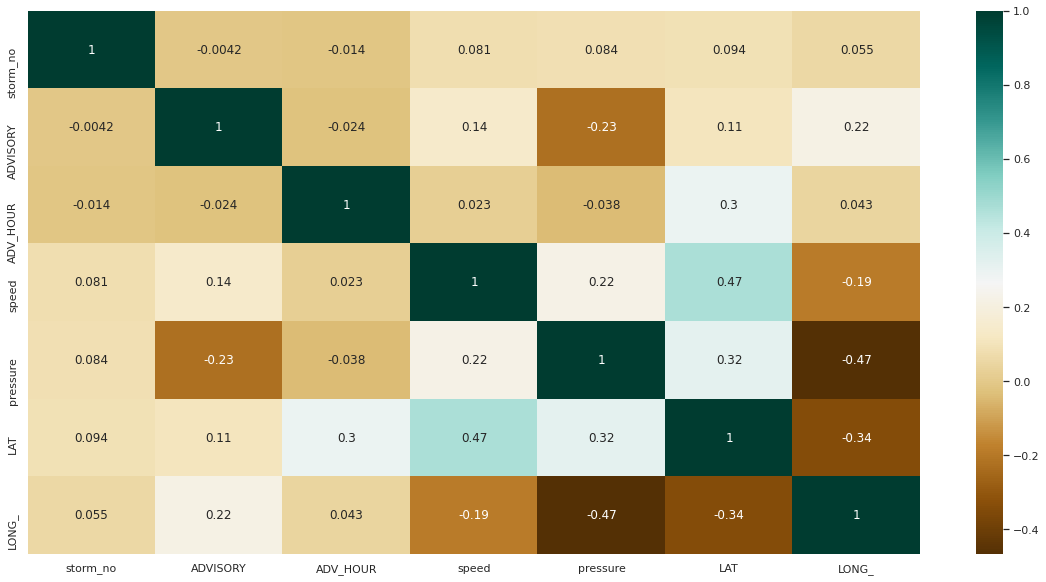

In [92]:
# Finding the relations between the variables of dataframe to do it I used Heatmap
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c